Import python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import seaborn as sns
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

Read the dataset

In [2]:
df = pd.read_csv('sentiment_tweets3.csv')

Get the info and description about the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [4]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


Dropping the Column "Index"

In [5]:
df = df.drop(['Index'], axis=1)

Get the updated info about the Data Frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   message to examine         10314 non-null  object
 1   label (depression result)  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


Plot based on label (depression result) vs No. of samples

array([[<Axes: title={'center': 'label (depression result)'}>]],
      dtype=object)

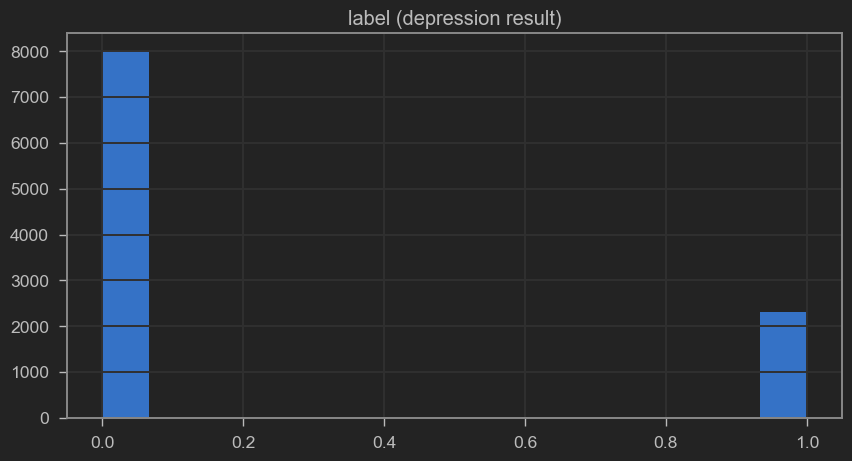

In [7]:
df.hist(bins=15, figsize=(10,5), color ='b')

Create a new column with name "length"

In [8]:
df['length'] = df['message to examine'].apply(len)

Get updated description of Data Frame

In [9]:
df.describe()

,label (depression result),length
count,10314.000000,10314.000000
mean,0.224355,92.616153
std,0.417177,64.670905
min,0.000000,1.000000
25%,0.000000,48.000000
50%,0.000000,78.000000
75%,0.000000,119.000000
max,1.000000,874.000000


Display a histogram plot of column "length"

<Axes: ylabel='Frequency'>

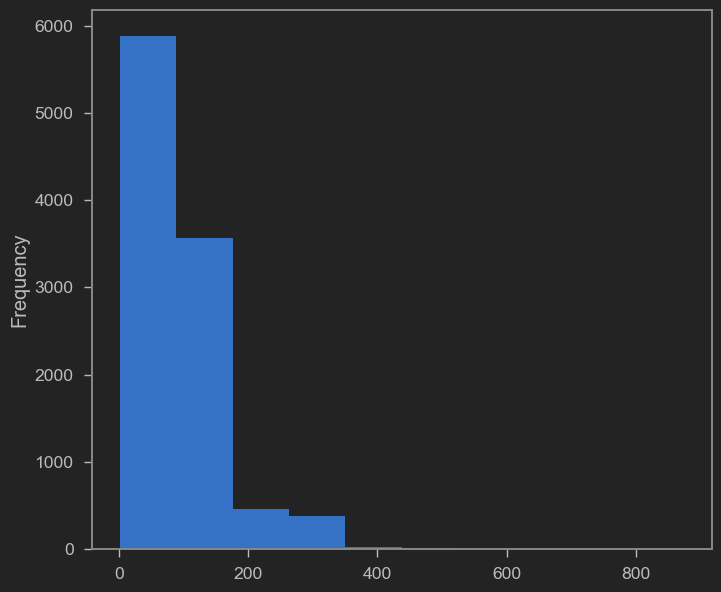

In [10]:
df['length'].plot(bins = 10, kind='hist')

Differentiate the data into classes using the labels

In [11]:
positive = df[df['label (depression result)']==0]
negative = df[df['label (depression result)']==1]

Combine all the messages to a single sentence

In [12]:
sentences = df['message to examine'].tolist()
sentence = " ".join(sentences)

Combine all the messages in each class as a single sentence

In [13]:
pos_sentences = positive['message to examine'].tolist()
pos_sentence = " ".join(pos_sentences)

neg_sentences = negative['message to examine'].tolist()
neg_sentence = " ".join(neg_sentences)

Install WordCloud

In [14]:
!pip install wordcloud

Display the wordcloud for the complete dataset

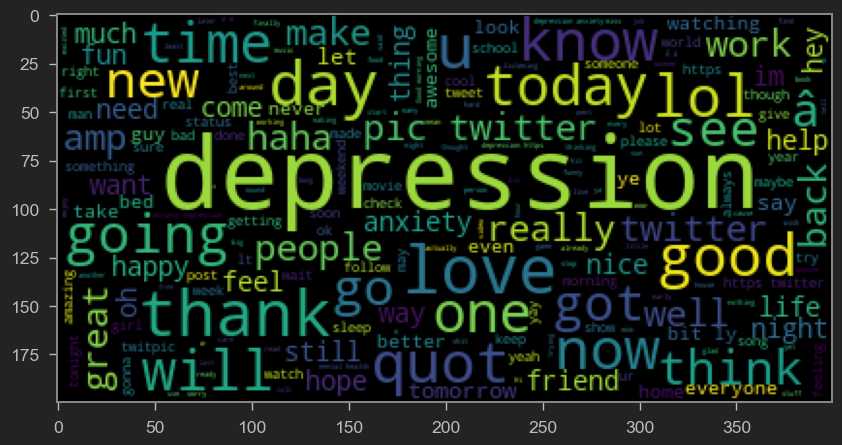

In [15]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentence))

Display the wordcloud for the class "positive"

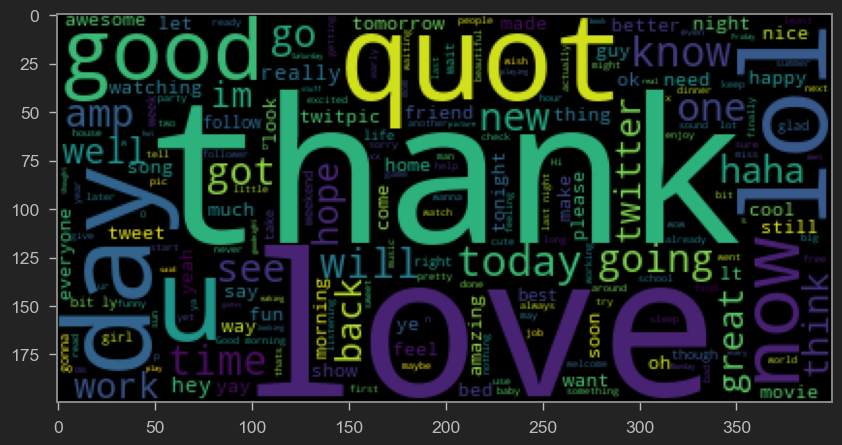

In [16]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(pos_sentence))

Display the wordcloud for the class "negative"

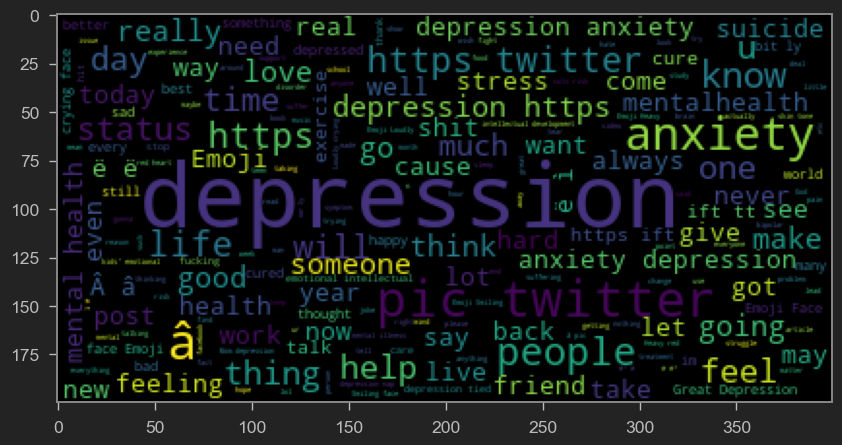

In [17]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neg_sentence))

Import libraries for Data Cleaning

In [18]:
import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\SREENA
[nltk_data]     RAAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_joined = "".join(Test_punc_removed)
    Test_punc_removed_joined_clean = [word for word in Test_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_joined_clean

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning)
message_vectorizer = vectorizer.fit_transform(df['message to examine'])

In [21]:
X = pd.DataFrame(message_vectorizer.toarray())

In [22]:
y = df['label (depression result)']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

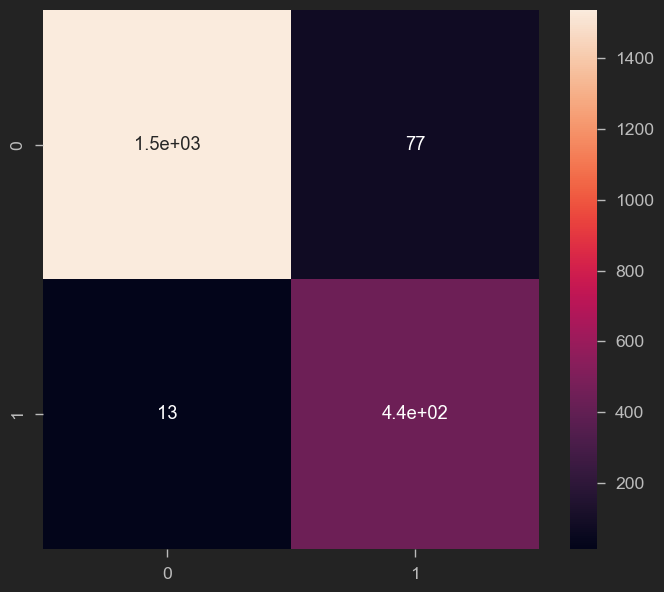

In [26]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm , annot=True)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1614
           1       0.85      0.97      0.91       449

    accuracy                           0.96      2063
   macro avg       0.92      0.96      0.94      2063
weighted avg       0.96      0.96      0.96      2063

